In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
ALGO = ['correction', 'detection_correction']
COMMODITY = ['cobalt_shift_new_20', 'copper_shift_new_20', 'magnesium_shift_new_20', 'nickel_shift_new_20']

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_ablation_barcharts(xlsx_path, algorithm, comm):
    # Read the xlsx file into a pandas DataFrame
    df = pd.read_excel(xlsx_path)
    
    # Fill empty 'Exclude' fields with 'None'
    df['Exclude'].fillna('None', inplace=True)
    
    # Filter based on the algorithm
    df = df[df['Algorithm'] == algorithm]

    # Identify unique models
    models = df['Model'].unique()
    
    for model in models:
        model_df = df[df['Model'] == model]

        # Prepare the data for plotting
        excluded_models = sorted(model_df['Exclude'].unique(), key=lambda x: (x != 'None'))
        prec_edcr = model_df.groupby('Exclude')['Precision (EDCR)'].mean().reindex(excluded_models)
        rec_edcr = model_df.groupby('Exclude')['Recall (EDCR)'].mean().reindex(excluded_models)

        barWidth = 0.35
        r1 = np.arange(len(prec_edcr))
        r2 = [x + barWidth for x in r1]

        all_values = pd.concat([prec_edcr, rec_edcr])
        min_value = all_values.min()
        max_value = all_values.max()
        margin = (max_value - min_value) * 0.1
        y_min = max(min_value - margin, 0)
        y_max = min(max_value + margin, 1)

        plt.figure(figsize=(10,5))
        bars1 = plt.bar(r1, prec_edcr, color='k', width=barWidth, edgecolor='grey', label='Precision (EDCR)')
        bars2 = plt.bar(r2, rec_edcr, color='white', width=barWidth, edgecolor='black', label='Recall (EDCR)')

        # Calculate differences from 'None' for annotations
        none_precision = prec_edcr.get('None', 0)
        none_recall = rec_edcr.get('None', 0)
        for bar, label in zip(bars1, excluded_models):
            current_value = prec_edcr[label]
            diff = current_value - none_precision
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{sign}{abs(diff):.2f}', ha='center', va='bottom')

        for bar, label in zip(bars2, excluded_models):
            current_value = rec_edcr[label]
            diff = current_value - none_recall
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{sign}{abs(diff):.2f}', ha='center', va='bottom')

        plt.xlabel('Excluded Model', fontweight='bold')
        plt.xticks([r + barWidth/2 for r in range(len(prec_edcr))], excluded_models)
        plt.ylabel('EDCR Metric Score')
        plt.title(f'{comm}: EDCR Metric Scores for {model} using {algorithm}')
        plt.ylim([y_min, y_max])

        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()
        plt.close()



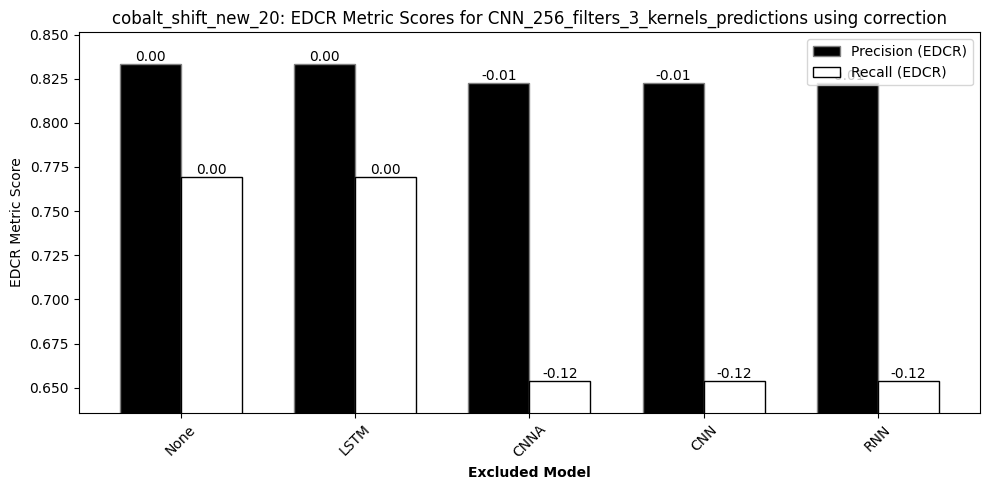

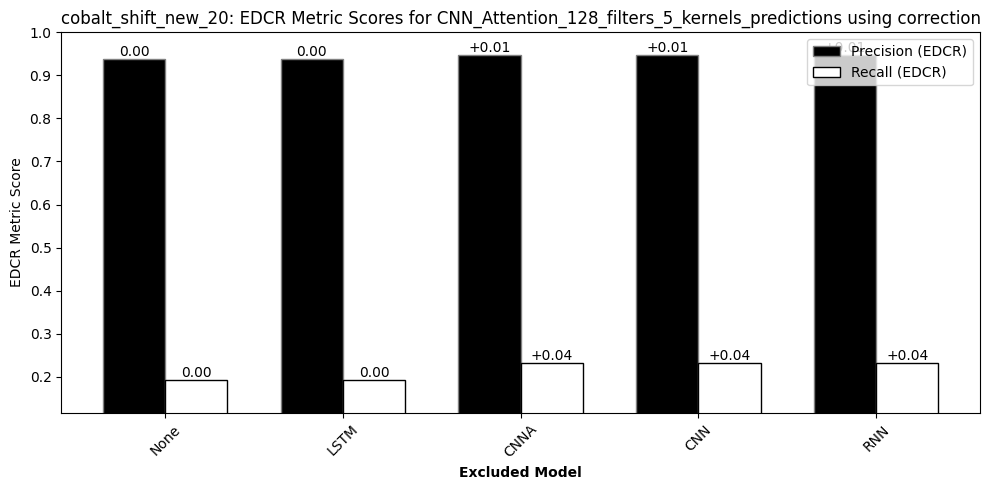

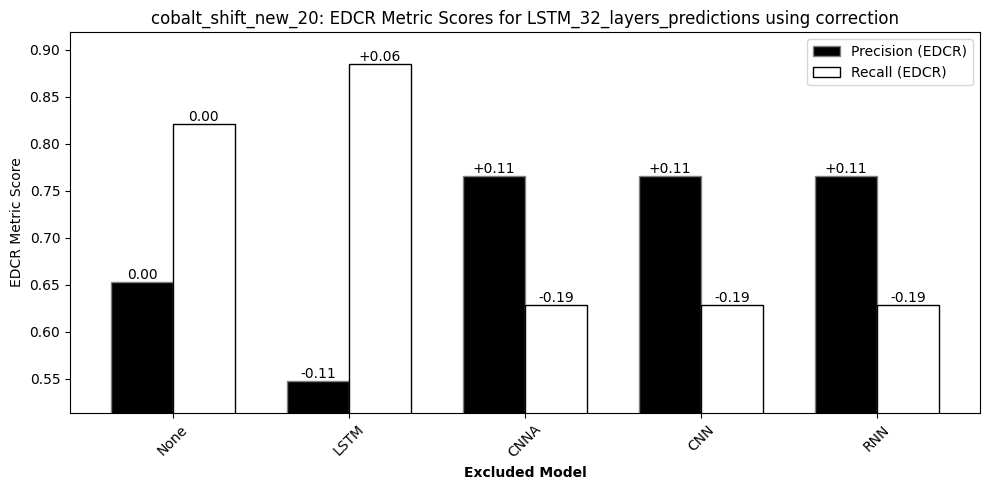

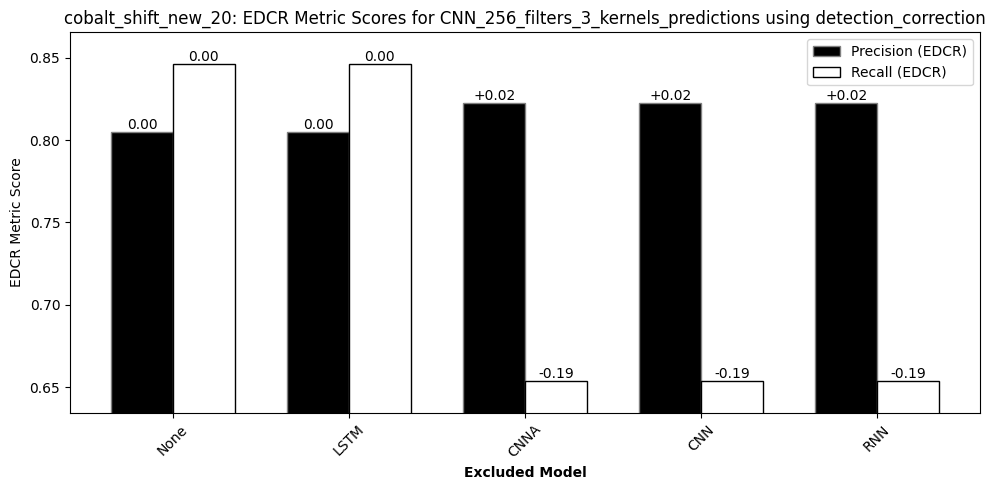

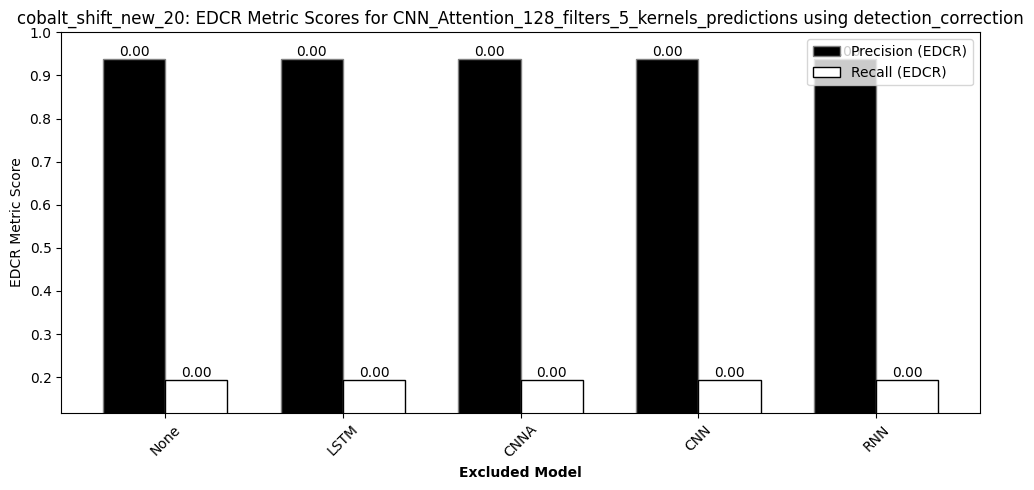

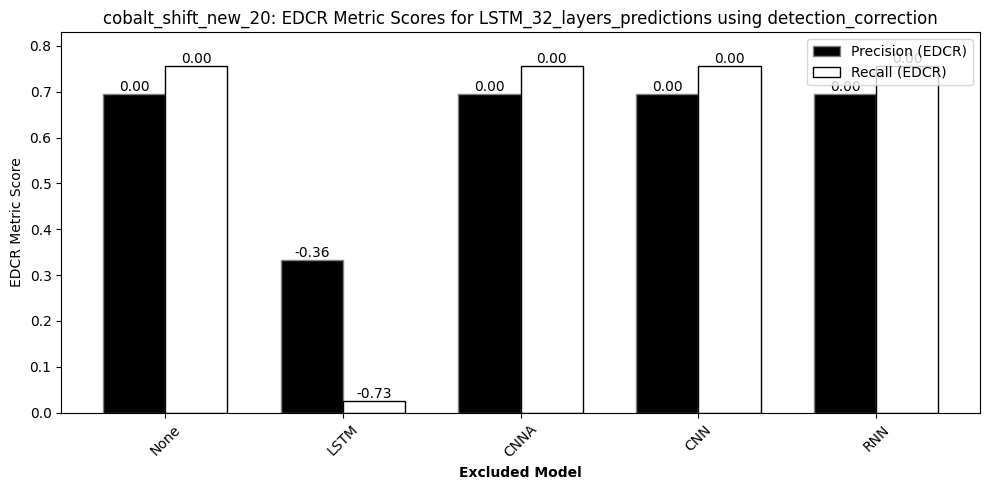

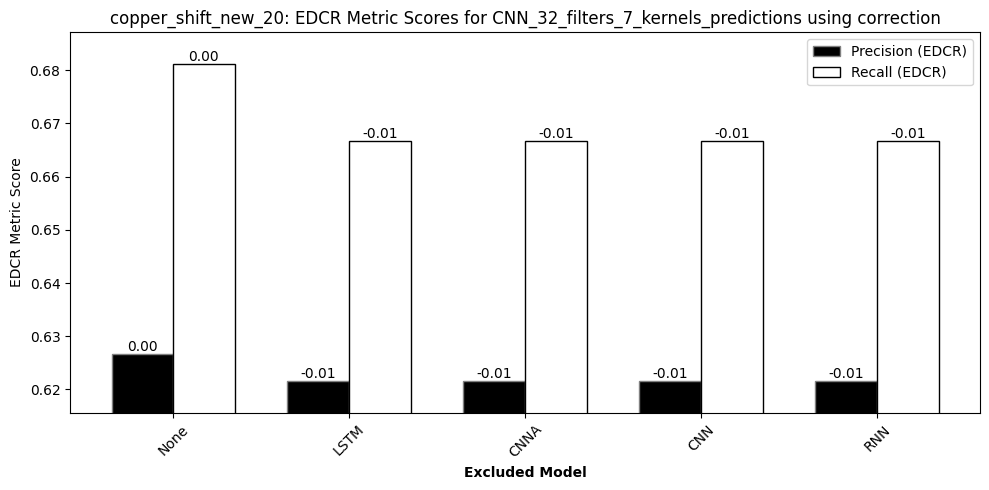

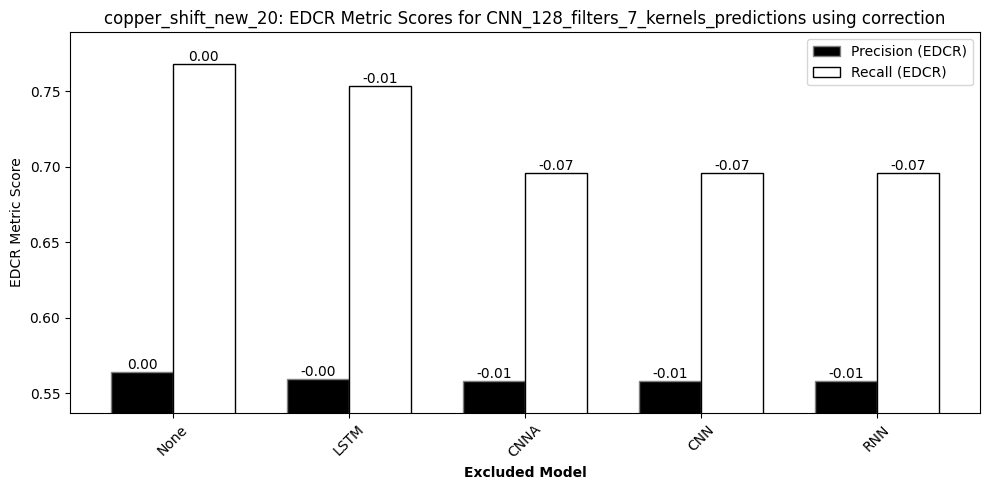

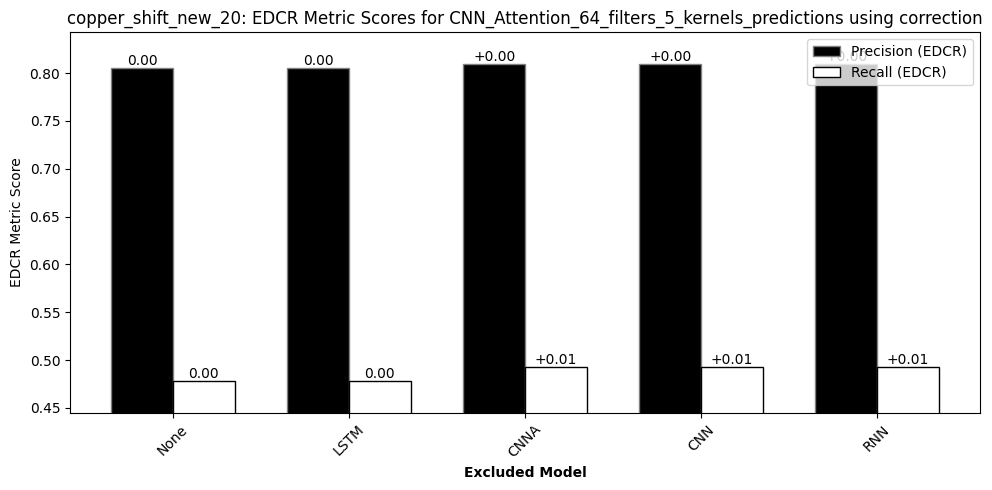

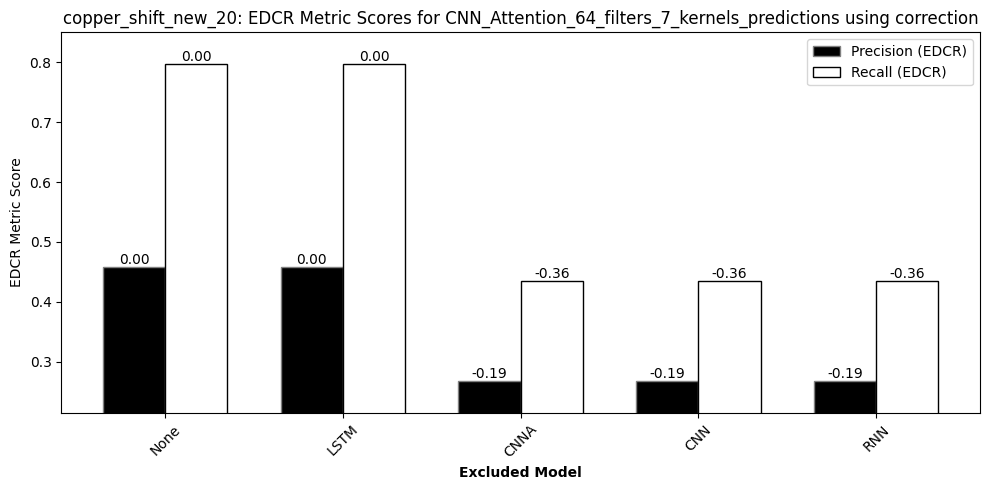

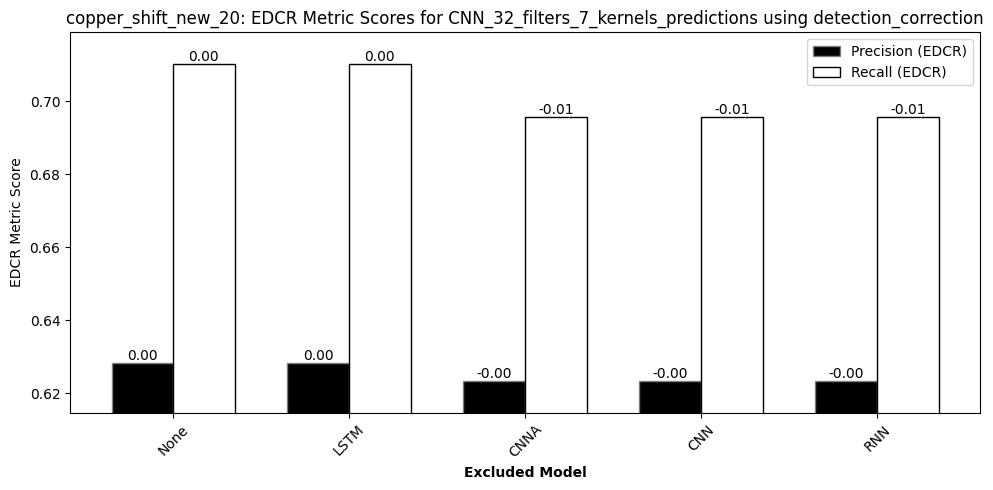

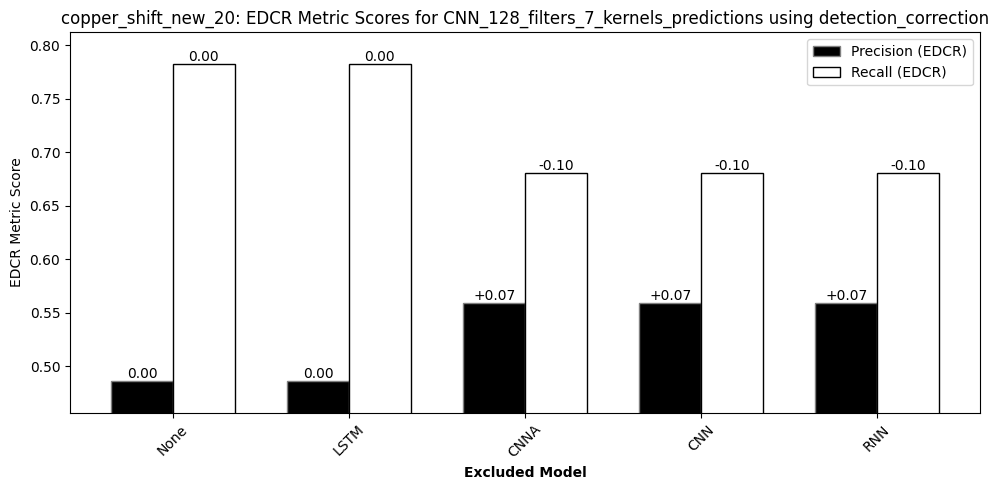

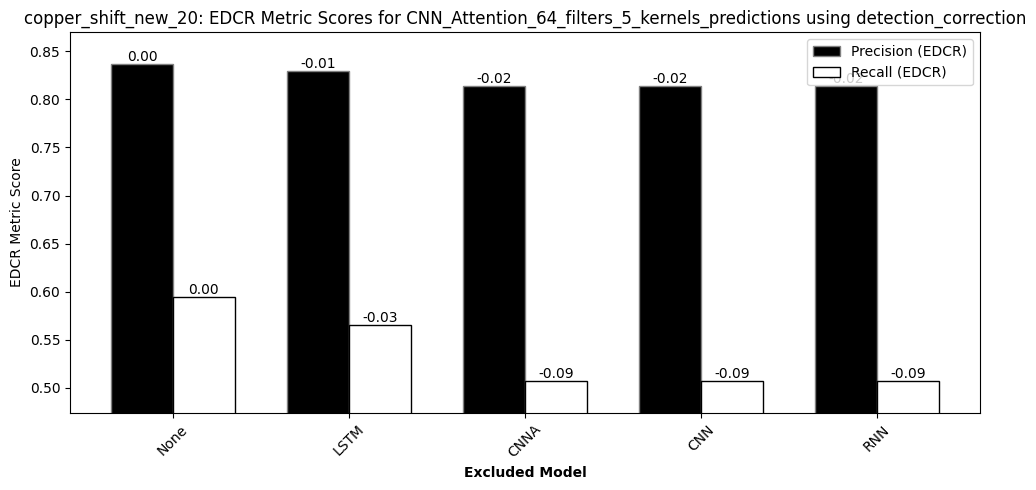

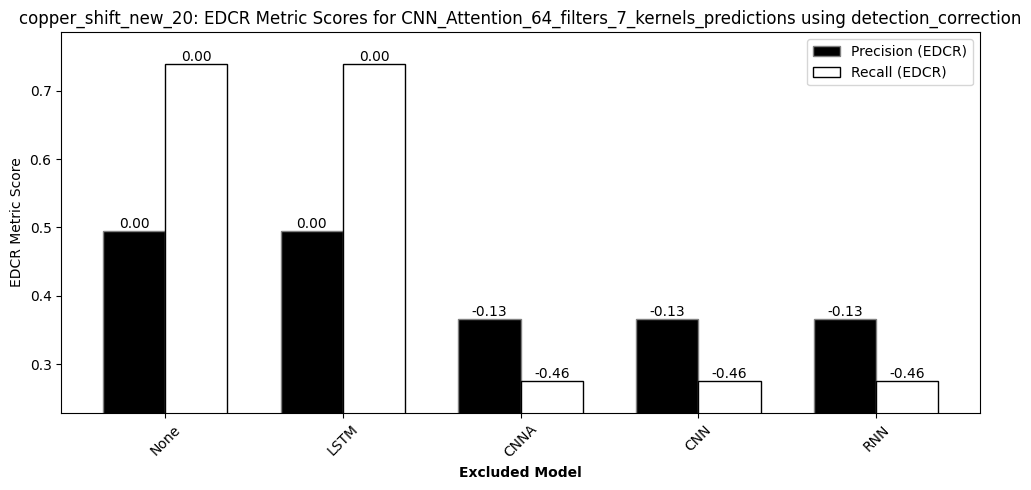

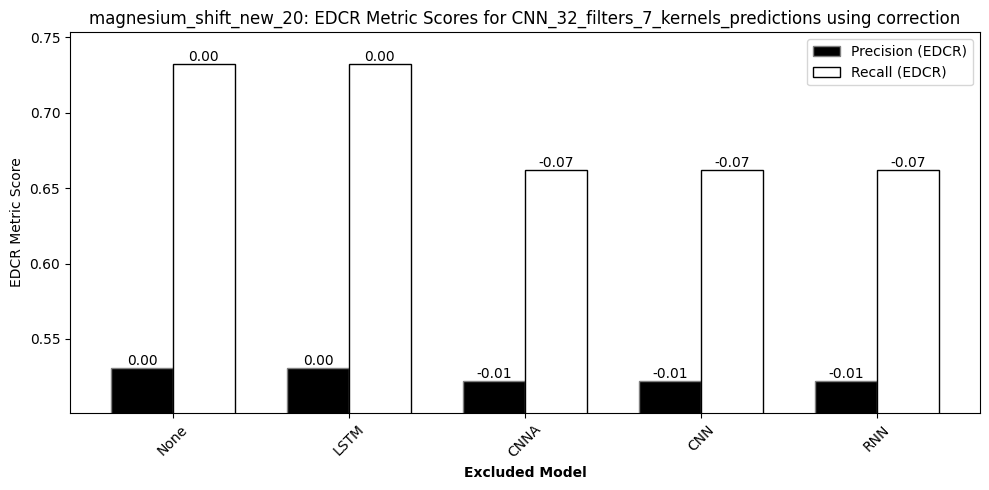

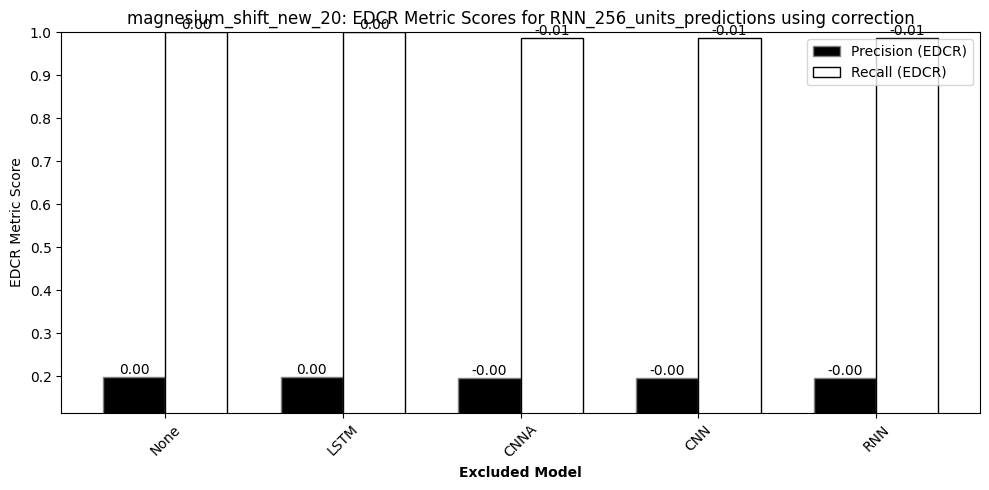

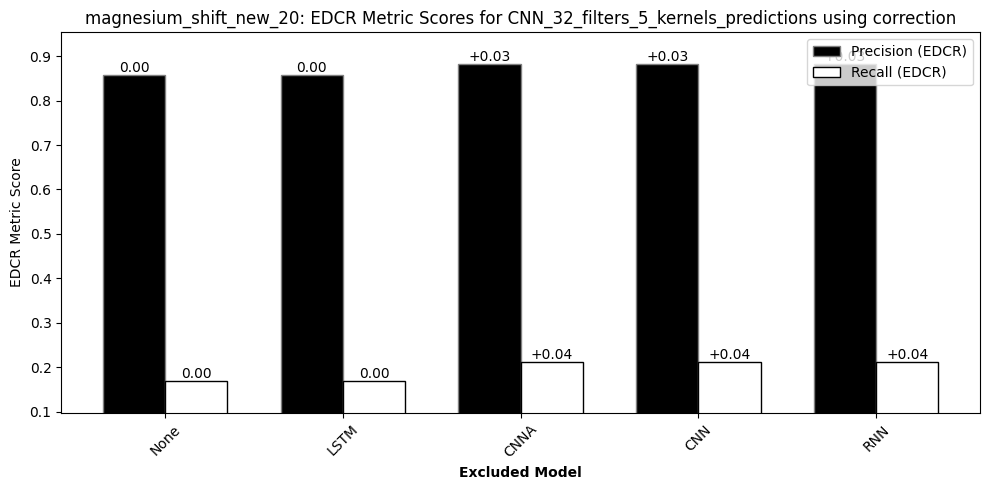

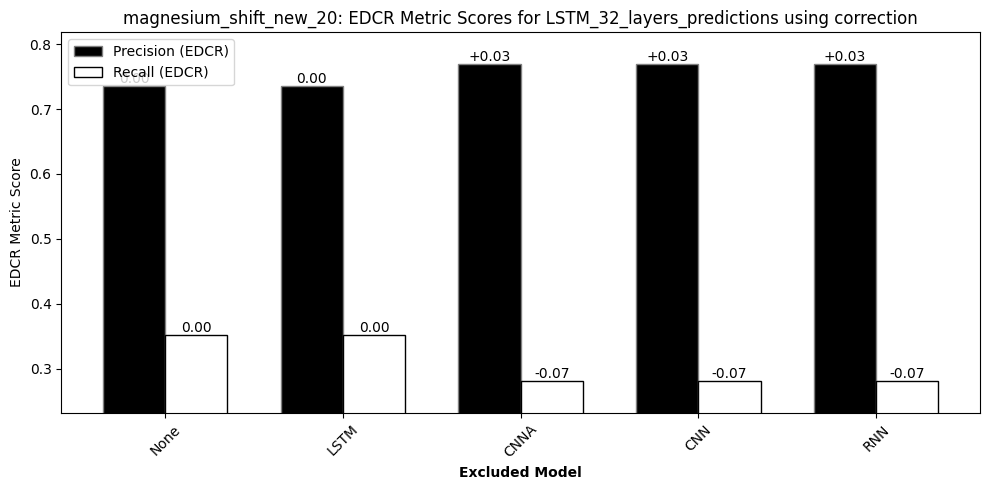

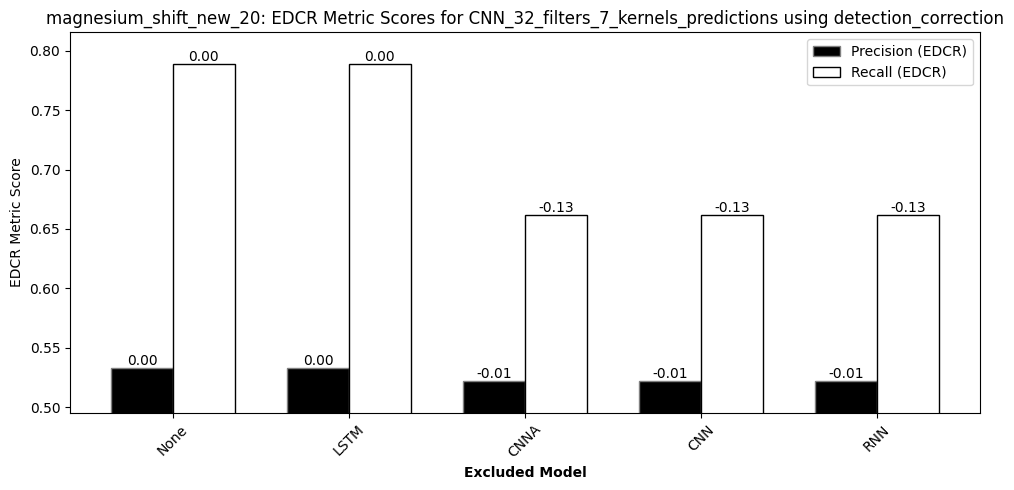

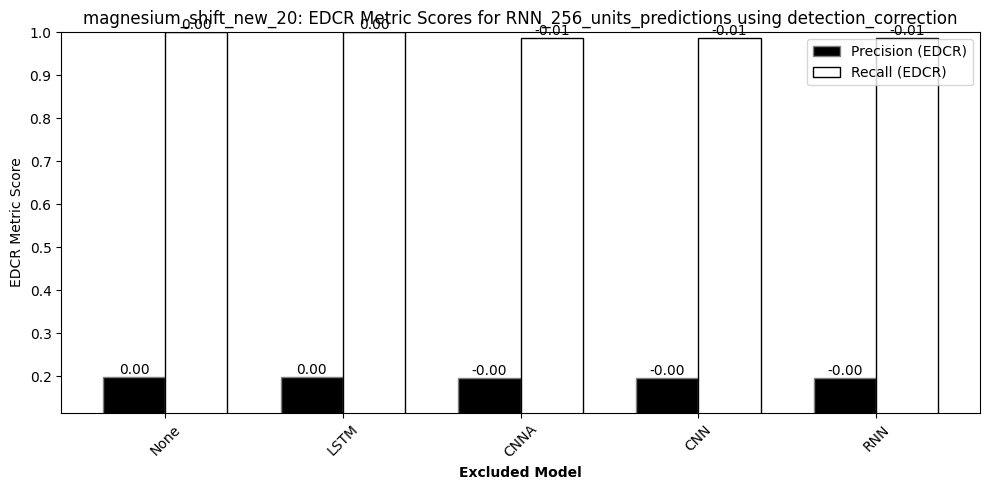

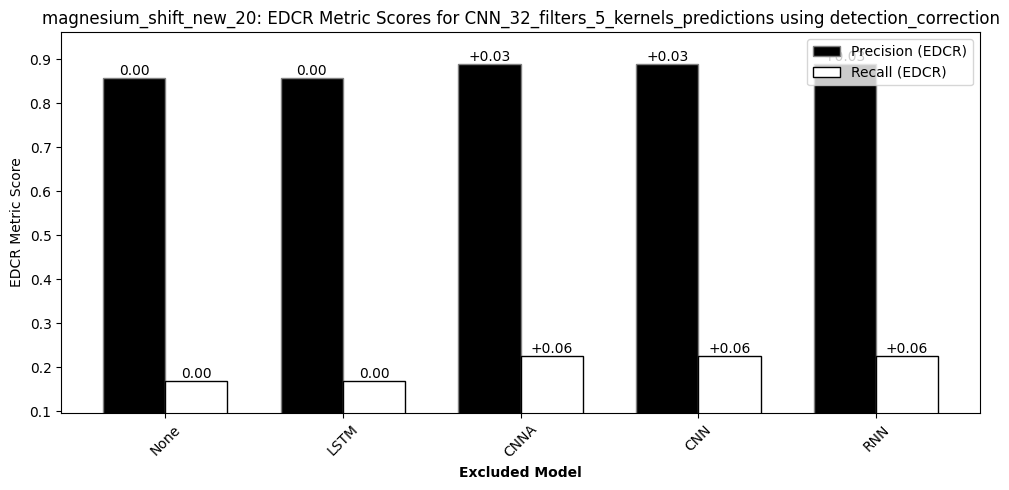

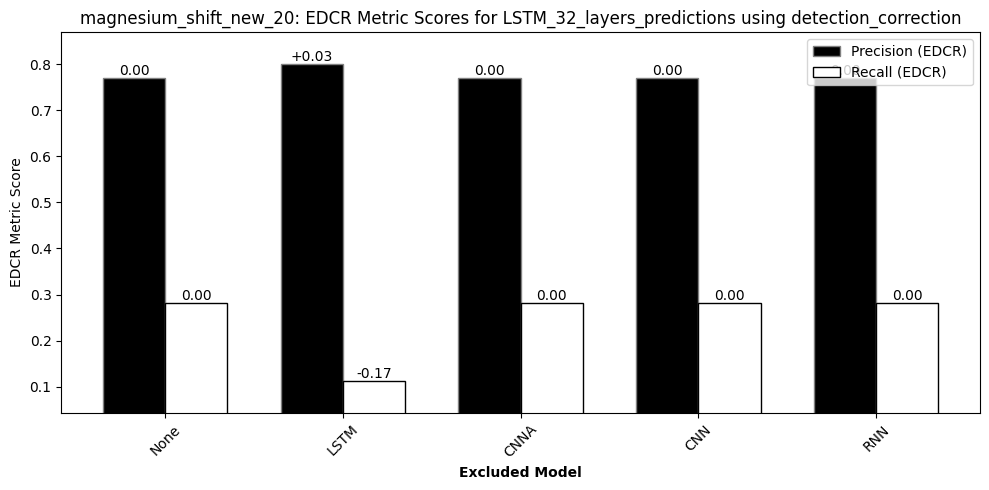

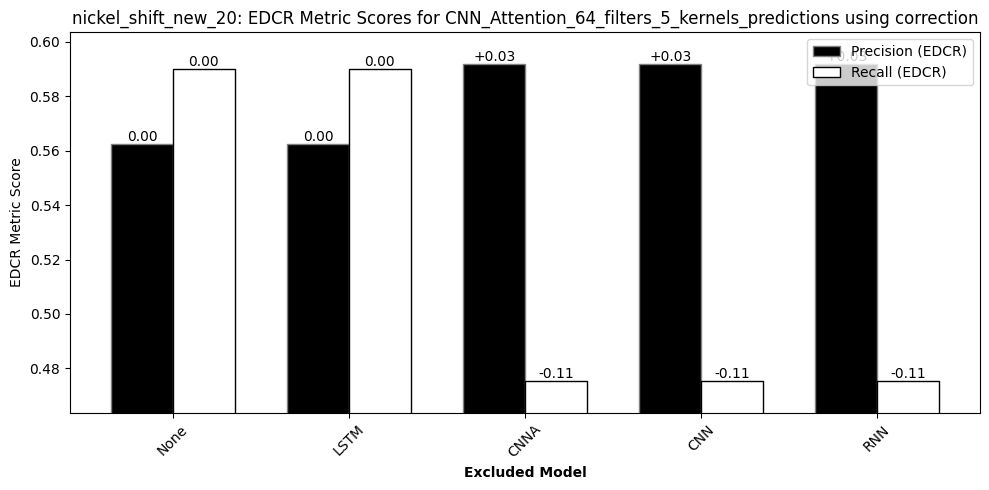

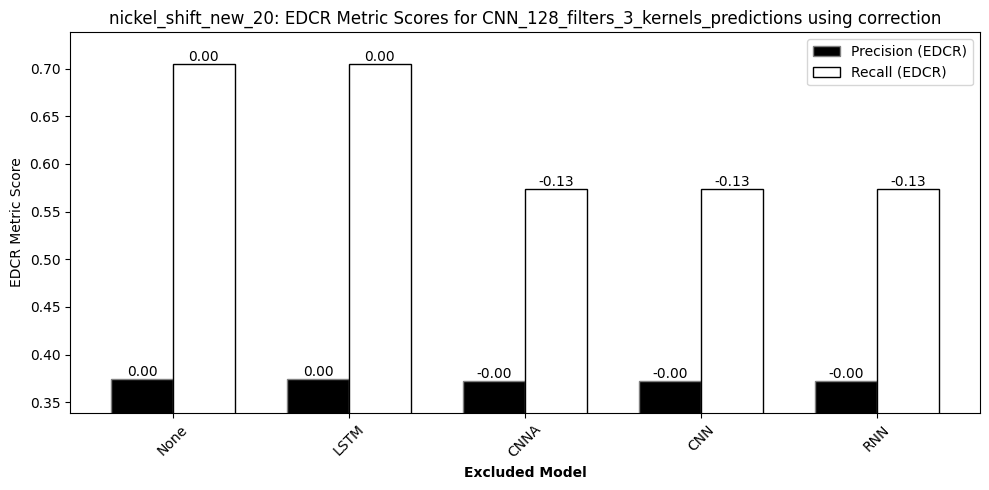

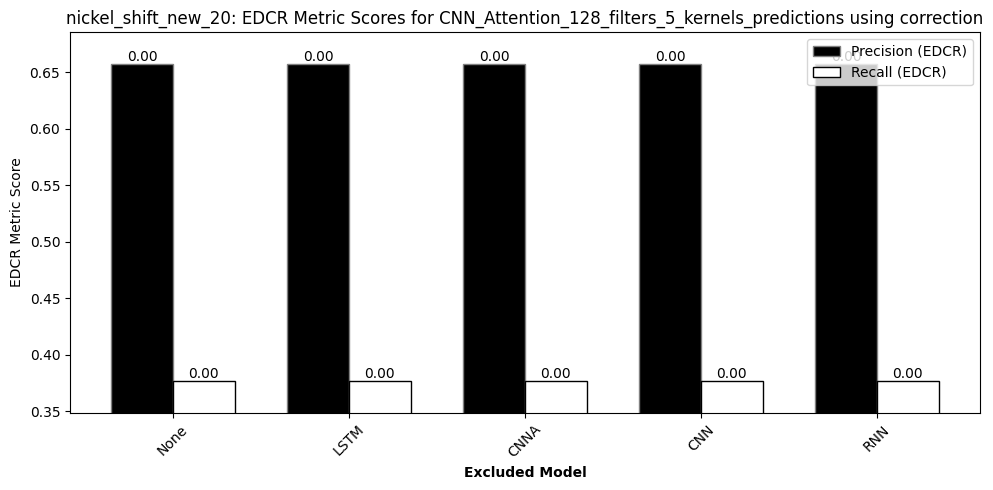

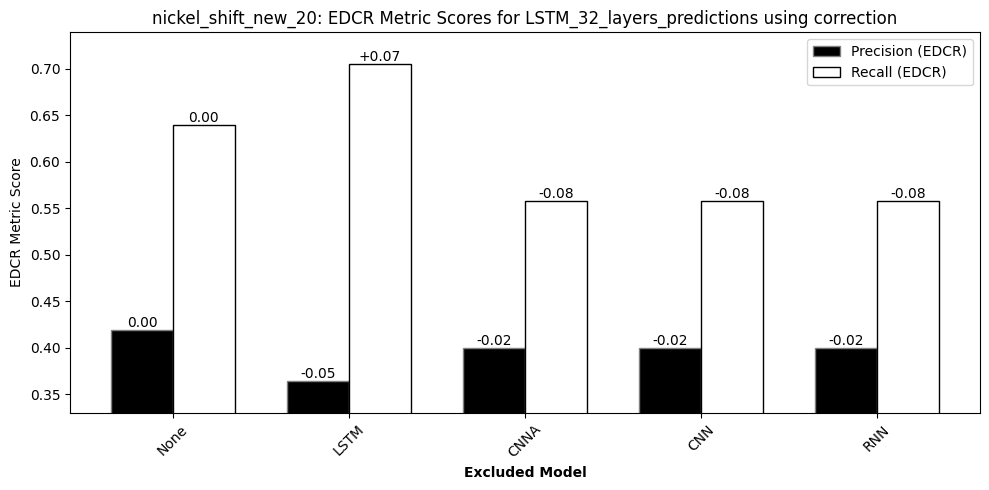

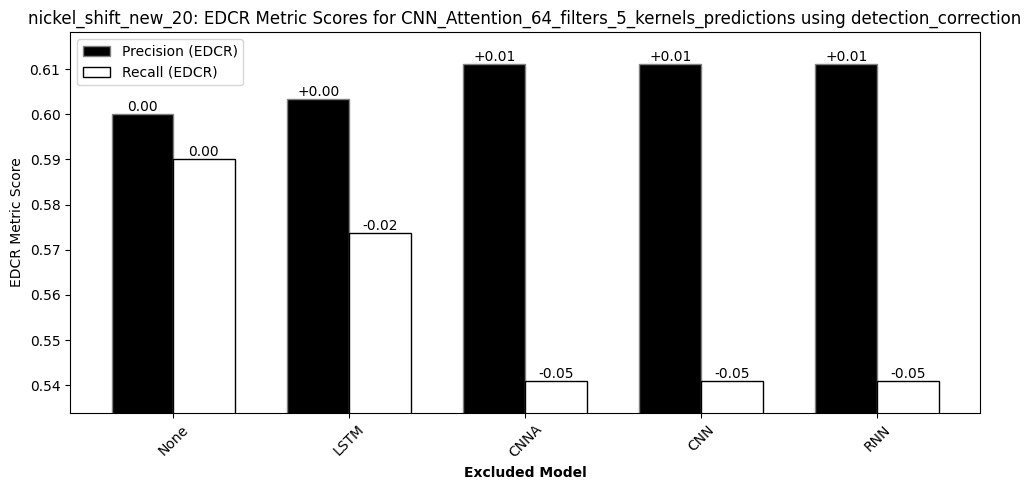

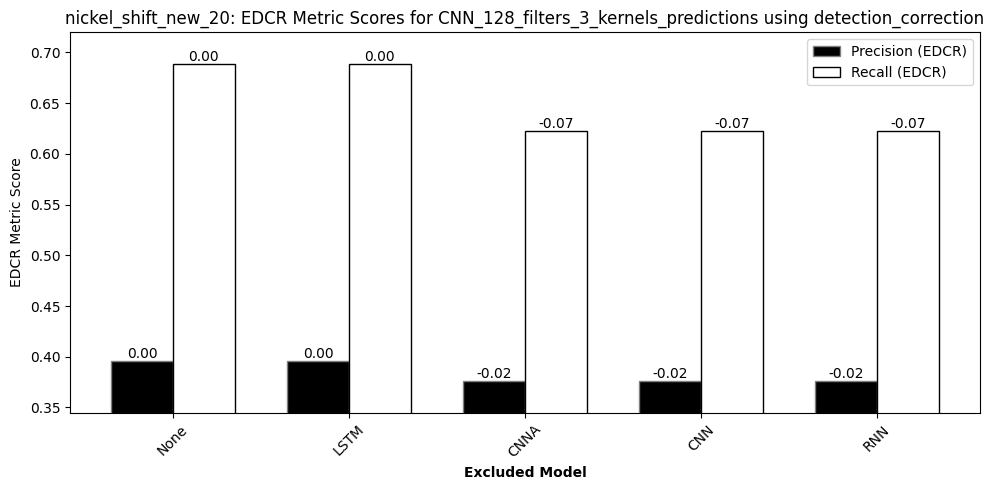

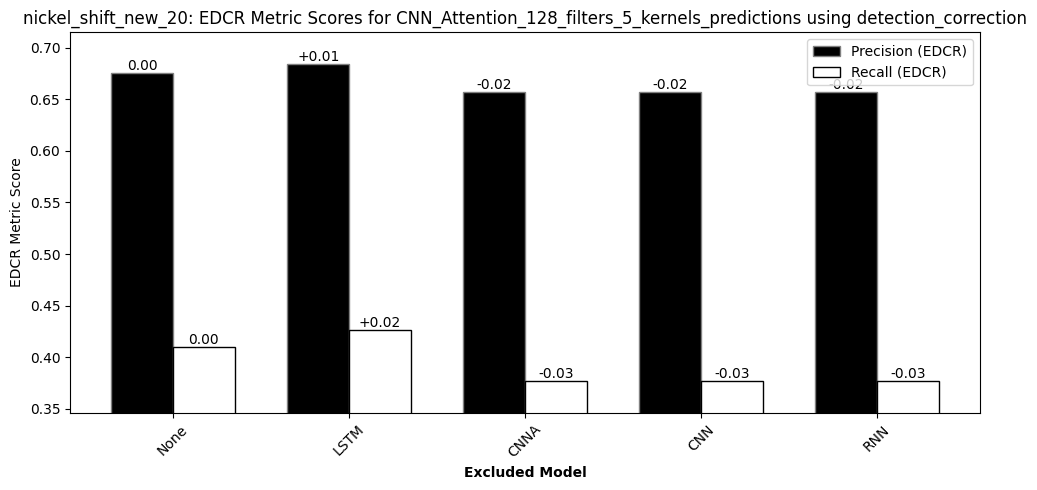

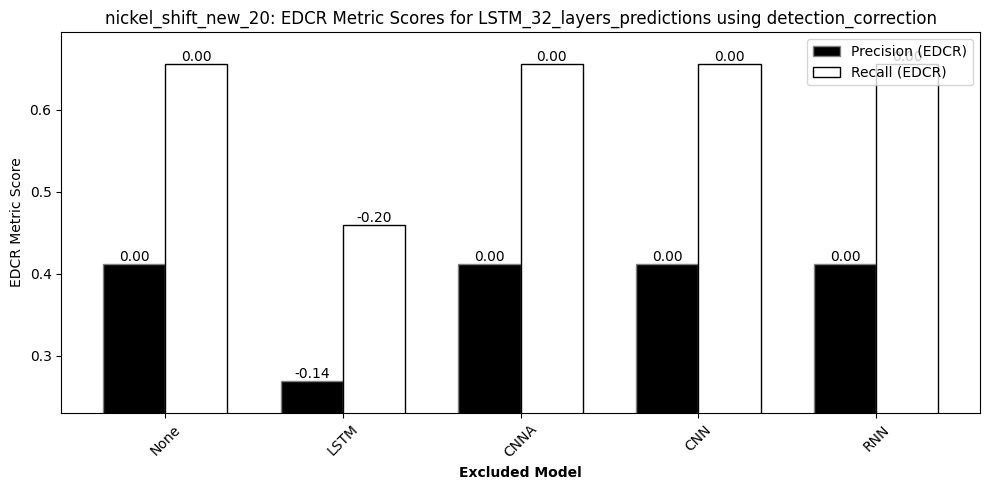

In [28]:
for comm in COMMODITY:
    for algo in ALGO:
        plot_ablation_barcharts(f'out/top_f1/{comm}_results.xlsx', algo, comm)
